In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from Data_Filter_for_model_selection import getFinalData

0.0
0.0
0.0
0.0
0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5835784 entries, 1 to 6039728
Data columns (total 16 columns):
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
RPT_DT               object
OFNS_DESC            object
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
BORO_NM              object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
Latitude             float64
Longitude            float64
Lat_Lon              object
dtypes: float64(3), object(13)
memory usage: 756.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
Shape_Area    77 non-null float64
Shape_Leng    77 non-null float64
Precinct      77 non-null int64
the_geom      77 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [4]:
crimes_pred_data = getFinalData()
crimes_pred_data.head()

,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Precinct,Time,Morning,Afternoon,Evening,Night
StartTime,,,,,,,,,,,,,
2014-03-30 20:40:00,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",ATTEMPTED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,20.0,False,False,True,False
2015-12-31 19:45:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,44,19.0,False,False,True,False
2015-12-31 17:15:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,17.0,False,True,False,False
2015-12-31 10:30:00,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED",COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,44,10.0,True,False,False,False
2015-12-31 00:23:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,44,0.0,False,False,False,False


In [5]:
crimes_pred_data['PREM_TYP_DESC'].value_counts(dropna=False)

STREET                        27303
RESIDENCE - APT. HOUSE        13607
RESIDENCE - PUBLIC HOUSING     2349
Name: PREM_TYP_DESC, dtype: int64

In [6]:
data_morn = crimes_pred_data.drop(['PD_DESC','CRM_ATPT_CPTD_CD','Precinct','Time','Afternoon','Evening','Night'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
data_morn['OFNS_DESC'] = labelencoder_X.fit_transform(data_morn['OFNS_DESC'])
data_morn['PREM_TYP_DESC'] = labelencoder_X.fit_transform(data_morn['PREM_TYP_DESC'])
data_morn['LAW_CAT_CD'] = labelencoder_X.fit_transform(data_morn['LAW_CAT_CD'])
data_morn['BORO_NM'] = labelencoder_X.fit_transform(data_morn['BORO_NM'])
data_morn['LOC_OF_OCCUR_DESC'] = labelencoder_X.fit_transform(data_morn['LOC_OF_OCCUR_DESC'])
data_morn['Morning'] = labelencoder_X.fit_transform(data_morn['Morning'])

In [8]:

data_morn.head()

,OFNS_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Morning
StartTime,,,,,,
2014-03-30 20:40:00,1,0,0,1,0,0
2015-12-31 19:45:00,0,1,0,1,2,0
2015-12-31 17:15:00,0,1,0,1,0,0
2015-12-31 10:30:00,0,1,0,1,0,1
2015-12-31 00:23:00,0,1,0,1,2,0


In [9]:
data_morn['PREM_TYP_DESC'].value_counts(dropna=False)

2    27303
0    13607
1     2349
Name: PREM_TYP_DESC, dtype: int64

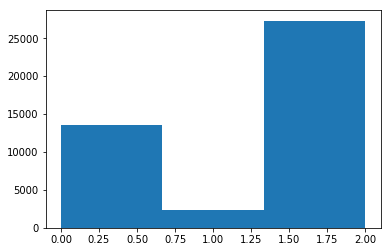

In [11]:
plt.hist(data_morn['PREM_TYP_DESC'],bins=3)
plt.show()

C:\Users\Riidhima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


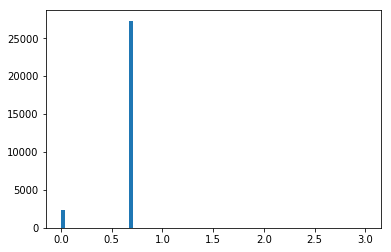

C:\Users\Riidhima\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


<bound method NDFrame.describe of StartTime
2014-03-30 20:40:00        -inf
2015-12-31 19:45:00    0.301030
2015-12-31 17:15:00        -inf
2015-12-31 10:30:00        -inf
2015-12-31 00:23:00    0.301030
2015-12-30 19:00:00        -inf
2015-12-29 21:00:00    0.301030
2015-12-28 18:00:00    0.301030
2014-02-24 19:00:00    0.301030
2014-03-24 04:15:00        -inf
2014-02-14 22:40:00        -inf
2014-02-12 10:55:00    0.301030
2014-02-16 17:10:00    0.301030
2014-02-18 18:55:00    0.301030
2014-03-04 16:30:00    0.301030
2014-03-05 14:30:00    0.301030
2014-03-08 21:30:00    0.301030
2014-03-08 22:15:00    0.301030
2014-03-20 12:31:00    0.301030
2014-03-30 23:20:00    0.301030
2014-04-01 23:25:00    0.301030
2014-04-04 18:55:00    0.301030
2014-04-04 13:15:00    0.301030
2014-04-23 21:35:00    0.301030
2014-05-03 18:05:00    0.301030
2014-05-07 14:30:00    0.301030
2014-05-09 18:20:00    0.301030
2015-04-23 16:00:00        -inf
2015-05-17 23:05:00        -inf
2015-10-16 19:12:00    0.301

In [16]:
plt.hist(np.log(data_morn['PREM_TYP_DESC']),bins=80,
        range=(0,3.0))
plt.show()
np.log10(data_morn['PREM_TYP_DESC']).describe

In [19]:
from numpy import median
median(np.log10(data_morn['PREM_TYP_DESC']))

C:\Users\Riidhima\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


0.3010299956639812

In [20]:

X = data_morn.iloc[:, 0:5].values
Y = data_morn.iloc[:, 5].values

In [21]:
X.shape

(43259, 5)

In [22]:
Y.shape

(43259,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [42]:
explained_variance

array([0.34866883, 0.25363372])

In [43]:
#from Principle_component_analysis import getXTrain,getYTrain,getXTest,getYTest,getVisuals
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [44]:
#Get Trained and Test data after Principle Component Analysis
#X_train = getXTrain()
#Y_train = getYTrain()
#X_test = getXTest()
#Y_test = getYTest()

In [47]:
X_train

array([[-0.43244121,  0.1979671 ],
       [ 1.88621246, -0.18112658],
       [-0.97868672, -1.36167396],
       ...,
       [ 1.88621246, -0.18112658],
       [ 1.33996695, -1.74076764],
       [ 1.12652553, -0.24190184]])

In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import os

from sklearn.metrics import classification_report
import sklearn.metrics

In [56]:

classifier= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
classifier= classifier.fit(X_train,Y_train)
print(type(classifier))

predictions=classifier.predict(X_test)
predictions_train=classifier.predict(X_train)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,predictions)
print('The confusion matrix is =')
print(confusion_matrix)

test_accuracy_score= sklearn.metrics.accuracy_score(Y_test,predictions)
print('The testing accuracy =')
print(test_accuracy_score)

train_accuracy_score= sklearn.metrics.accuracy_score(Y_train,predictions_train)
print('The training accuracy =')
print(train_accuracy_score)


<class 'sklearn.tree.tree.DecisionTreeClassifier'>
The confusion matrix is =
[[9497    0]
 [1318    0]]
The testing accuracy =
0.8781322237632917
The training accuracy =
0.8769263962520034


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cross_val_score(classifier, X, Y)
print(cross_val_score)
predicted_cross = cross_val_predict(classifier, X, Y, cv=10)
print(predicted_cross)

<function cross_val_score at 0x0000025547223F28>
[0 0 0 ... 0 0 0]


In [70]:
#Confusion matrix for Tree
import sklearn.metrics
from sklearn.metrics import classification_report


print(1- metrics.accuracy_score(Y_test,predictions))
print(metrics.precision_score(Y_test,predictions))

TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

sensitivity = TN/ float(TN + FP)
print(sensitivity)

false_positive_rate= FP/ float (TN+FP)
print (false_positive_rate)

0.1218677762367083
0.0
1.0
0.0


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


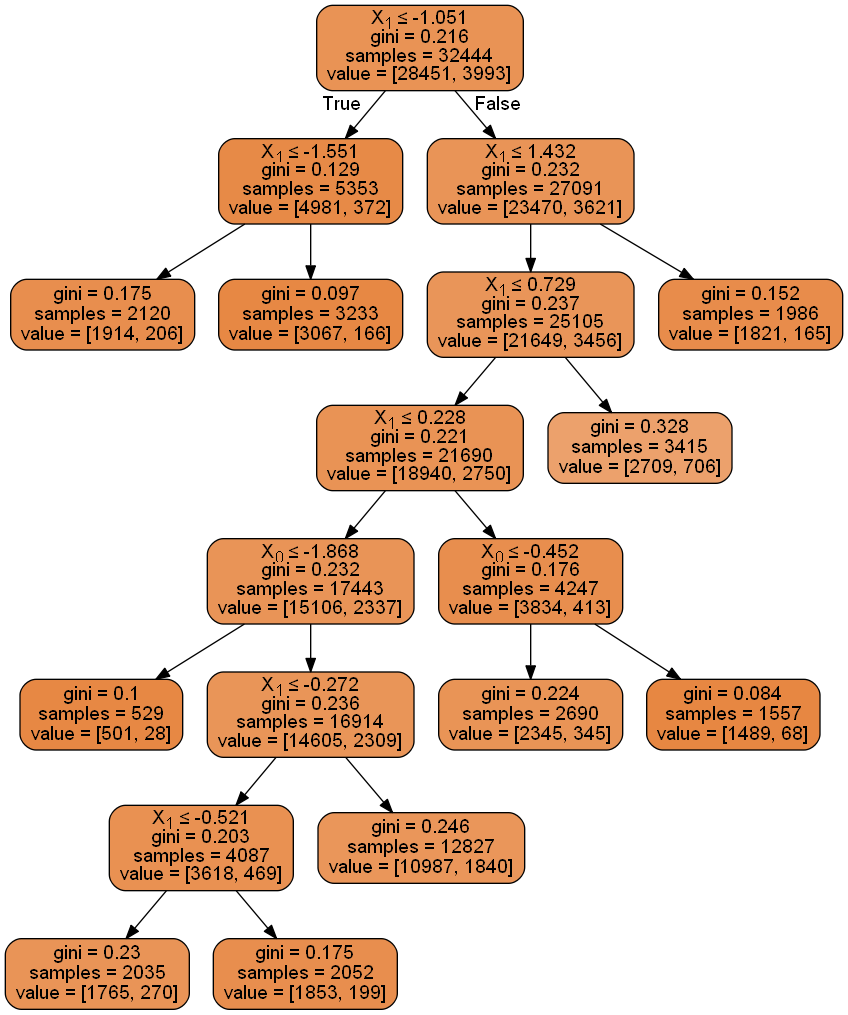

In [61]:
#Viewing the Tree output Image

from io import StringIO
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest.fit(X_train,Y_train)

print('acc for training data: {:.3f}'.format(forest.score(X_train,Y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,Y_test)))

acc for training data: 0.877
acc for test data: 0.878


In [68]:
from sklearn import metrics

forpredict=forest.predict(X_test)

confusion_matrix= sklearn.metrics.confusion_matrix(Y_test,forpredict)
print('The confusion matrix is =')
print(confusion_matrix)

print('Recall')
print(1- metrics.accuracy_score(Y_test,forpredict))
print('Precision')
print(metrics.precision_score(Y_test,forpredict))

TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]

sensitivity = TN/ float(TN + FP)
print('sensitivity')
print(sensitivity)

false_positive_rate= FP/ float (TN+FP)
print('Specificity')
print (false_positive_rate)


The confusion matrix is =
[[9497    0]
 [1318    0]]
Recall
0.1218677762367083
Precision
0.0
sensitivity
1.0
Specificity
0.0


C:\Users\Riidhima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
